# Instructor Do: Random Forests

In [10]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading and Preprocessing Loans Encoded Data

In [11]:
# Loading data
df_loans = pd.read_csv("../Resources/loans_data_encoded.csv")
df_loans.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [12]:
# Define features set
X = df_loans.copy()
X.drop("bad", axis=1, inplace=True)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [13]:
# Define target vector
y = df_loans["bad"].ravel()
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [14]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [15]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [16]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [17]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [47]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1, random_state=78)

In [48]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [49]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [50]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [51]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,47,37
Actual 1,26,15


Accuracy Score : 0.496
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.56      0.60        84
           1       0.29      0.37      0.32        41

    accuracy                           0.50       125
   macro avg       0.47      0.46      0.46       125
weighted avg       0.53      0.50      0.51       125



## Feature Importance

In [52]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
print(importances)
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[5.65724132e-02 1.18229233e-01 3.67921186e-01 3.48615911e-01
 2.55874688e-02 2.94089841e-02 4.76604441e-05 2.78651253e-02
 1.83023723e-03 2.39217806e-02]


[(0.3679211858434715, 'age'),
 (0.3486159114669466, 'month_num'),
 (0.11822923302351299, 'term'),
 (0.056572413158772566, 'amount'),
 (0.02940898408901896, 'education_High School or Below'),
 (0.027865125277007127, 'education_college'),
 (0.025587468823879887, 'education_Bachelor'),
 (0.02392178063856854, 'gender_male'),
 (0.0018302372347028214, 'gender_female'),
 (4.766044411907978e-05, 'education_Master or Above')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

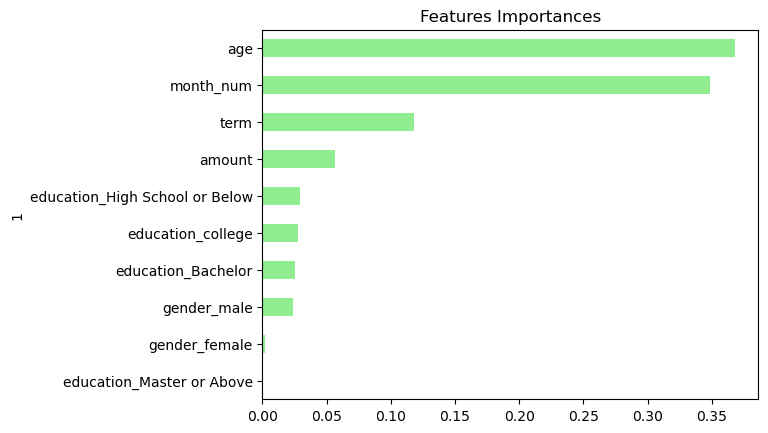

In [53]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)